# Fetal Health Project

Cardiotocography (CTG) is a continuous recording of the fetal heart rate and uterine contractions obtained via an ultrasound transducer placed on the mother's abdomen. It allows early-detection of the fetal health.

In this project, I will create a model using what we learned from the ML Bootcamp to classify the fetal's health based on CTG recordings.

### Goal

Classify the fetal health to help in preventing child and maternal mortality into three classes:
- Normal
- Suspect
- Pathological

## Libraries Imports

In [22]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score,mean_squared_error, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline


## Load Data

In [23]:
data = pd.read_csv('fetal_health.csv')

## Exploratory Data Analysis

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [25]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [26]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [27]:
data.shape

(2126, 22)

## Data Preprocessing

How many null values do we have?

In [28]:
data.isnull().sum().sum() 

0

How many missing values do we have?

In [29]:
data.isna().sum().sum() 

0

## The Target Column

In [30]:
data['fetal_health'].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

No handles with labels found to put in legend.


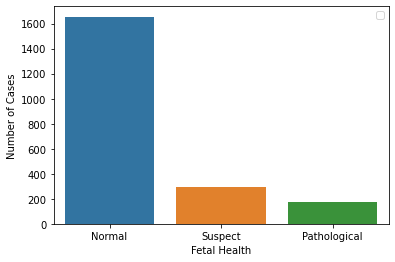

In [31]:
bal_fig= sns.countplot(data= data, x='fetal_health')
bal_fig.set(xlabel='Fetal Health', ylabel='Number of Cases')
bal_fig.legend()
plt.xticks([0,1,2],['Normal','Suspect','Pathological'])
plt.show()


The count plot shows that the data is imbalanced. This tends to give misleading accuracy of the classification model.

So, we may use the following measures for better indications:
- confusion matrix
- recall
- precision
- F1 score

## Data Analysis

### Correlation Matrix Heatmap

It is a graphical representation of correlation matrix representing correlation between different variables.


Reference: https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/#:~:text=in%20this%20post%3A-,Correlation%20heatmap%20is%20graphical%20representation%20of%20correlation%20matrix%20representing%20correlation,values%20from%20%2D1%20to%201.&text=imply%20causal%20relationship.-,Correlation%20between%20two%20variables%20can%20also%20be%20determined,plot%20between%20these%20two%20variables.

<AxesSubplot:>

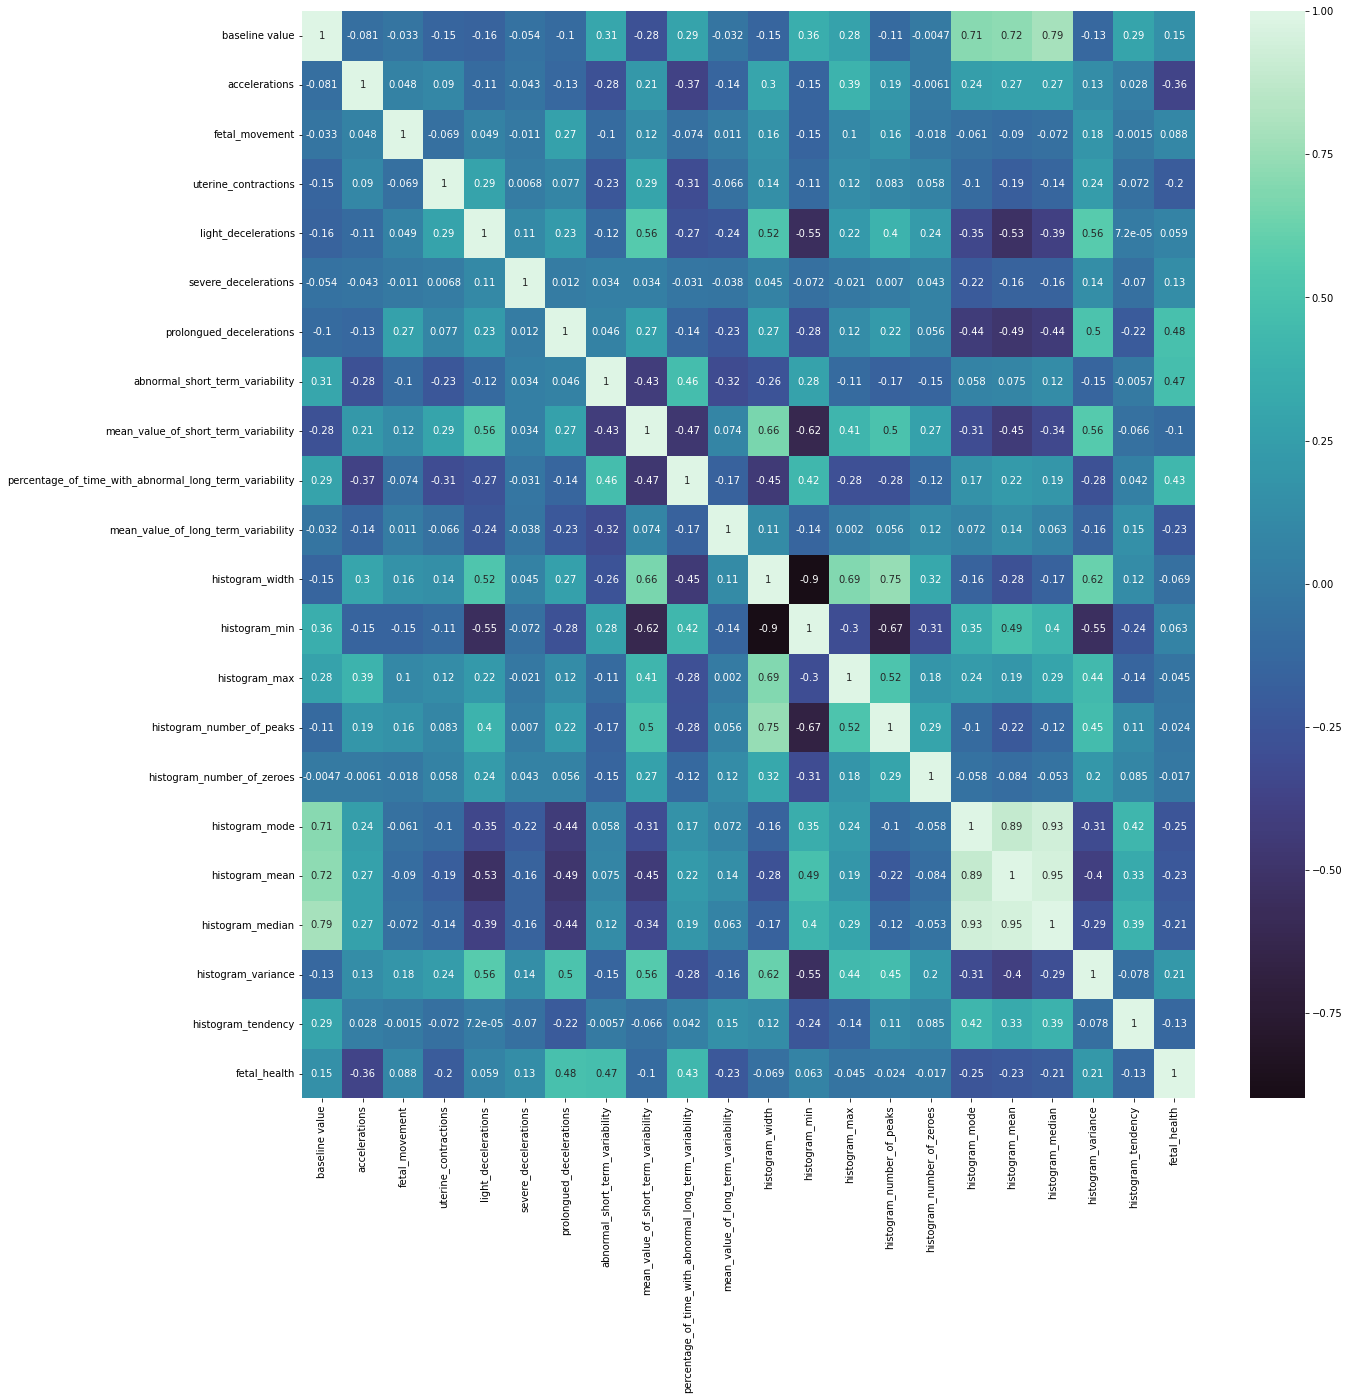

In [32]:
#correlation matrix heatmap
correlation_matrix= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(correlation_matrix, annot=True, cmap="mako", center=0)

The correlation matrix heatmap shows that the features with largest correlation with the fetal health state are: 
- prolongued decelartions 
- abnormal short term variability
- percentage of time with abnormal long term variability

We can clearly see the correlation values in the table below:

In [33]:
n_data = data.select_dtypes(exclude="object")
n_corr = n_data.corr()
num_features = n_corr['fetal_health'].sort_values(ascending=False).head(15).to_frame()

st = num_features.style.background_gradient(cmap="flare")
st

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


## Data Scaling

Feature scaling is a critical step in the preprocessing of data. The most common techniques are:
1. Normalization: used to bound the values between two numbers.
2. Standardization: used to transform the data to have a mean of zero and a variance of one. It makes the data unitless. 

Reference: https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048

In [34]:
cols_without_target= ['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width','histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean','histogram_median', 'histogram_variance', 'histogram_tendency']

scaled_X= StandardScaler() #Standardize features by removing the mean and scaling to unit variance.
X= pd.DataFrame(scaled_X.fit_transform(data.drop(['fetal_health'], axis=1),),columns= cols_without_target)

In [35]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


## Data Splitting

In [37]:
y= data['fetal_health']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

## Model Selection

In [39]:
#create a pipeline for each model
pipeline_LR=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_DTC=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_RFC=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_SVC=Pipeline([('sv_classifier',SVC())])

#create a list of pipelines
pipelines = [pipeline_LR, pipeline_DTC, pipeline_RFC, pipeline_SVC]

#create a dictionary for pipelines  for easy referencing
pipeline_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

#fit the pipelines to the training set using a loop
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], cv_score.mean()))

Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.938854 
SVC: 0.906594 


## Random Forest (RF)

Random Forest is an ensemble method, meaning that a random forest model is made up of a large number of small decision trees, called estimators, which each produce their own predictions. The random forest model combines the predictions of the estimators to produce a more accurate prediction.

Reference: https://deepai.org/machine-learning-glossary-and-terms/random-forest

In [40]:
#Random Forest classifier
RF = RandomForestClassifier()
RF_model = RF.fit(X_train, y_train)

#print baseline value
print(f"Baseline Random Forest: {round(RF_model.score(X_test, y_test), 3)}")

Baseline Random Forest: 0.945


In [41]:
#define dictionary for hyperparameters
h_params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100, 200, 500],
              "criterion": ["gini"]             
              }

In [42]:
#this method is only used to boost the model
cv_method = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [43]:
#Create GridSearchCV for the RF model and fit it on the training set
CV_RFC = GridSearchCV(estimator= RandomForestClassifier(), param_grid= h_params_RF, cv= cv_method)
CV_RFC.fit(X_train, y_train);

In [44]:
#Find the best estimator according to GridSearchCV
best_estimator_RF = CV_RFC.best_params_
print(f"Best estimator for RF: \n{best_estimator_RF}")

Best estimator for RF: 
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 500}


In [45]:
#Find the best score according to GridSearchCV
best_score_RF = CV_RFC.best_score_
print(f"Best score for RF: {round(best_score_RF, 4)}")

Best score for RF: 0.9388


In [52]:
#Create a new RF classifier model according to the results from the GridSearchCV
RF_new = RandomForestClassifier(criterion="gini", n_estimators=500, min_samples_leaf=1, min_samples_split=6, random_state=42)
RF_new_model = RF_new.fit(X_train, y_train)
#make predictions
RF_preds = RF_new_model.predict(X_test)

In [53]:
#calculate evaluation metrics
RF_mse = mean_squared_error(y_test, RF_preds)
RF_rmse = np.sqrt(mean_squared_error(y_test, RF_preds))
RF_train_score = RF_new_model.score(X_train, y_train)
RF_test_score = RF_new_model.score(X_test, y_test)

In [59]:
#print evaluation metrics
print(f"Mean Square Error= {round(RF_mse, 3)}")
print(f"Root Mean Square Error= {round(RF_rmse, 3)}")
print(f"R^2 on training set = {round(RF_train_score, 3)}")
print(f"R^2 on testing set = {round(RF_test_score, 3)}")

Mean Square Error= 0.08
Root Mean Square Error= 0.283
R^2 on training set = 0.995
R^2 on testing set = 0.944


In [55]:
print("Classification Report")
print(classification_report(y_test, RF_preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       496
         2.0       0.91      0.77      0.83       101
         3.0       0.86      0.93      0.89        41

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



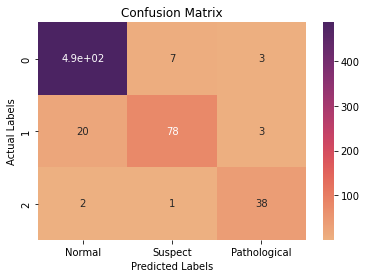

In [56]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, RF_preds), annot=True, ax = ax, cmap = "flare");

# labels, title and ticks
ax.set_xlabel("Predicted Labels");
ax.set_ylabel("Actual Labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);